# 章節目錄
1. Introduction  (單變量與多變量線性回歸 Simple and multiple linear regression)
2. Analysis of the dataset  (初步分析)
3. Scatter plots with Matplotlib and linear regression with Numpy  (利用numpy實作線性回歸)
4. Scatter plots and linear regression line with seaborn  (利用seaborn實作線性回歸)
5. Fitting a simple linear model using sklearn  (利用Scikit-learn實作線性回歸)
6. Pearson correlation coefficient
7. Residual plots
8. Multiple linear regression
9. Categorical variables in multiple linear regression

# 單變量與多變量線性回歸 Simple and multiple linear regression

在統計學中，線性回歸(Linear Regression)是利用稱為線性回歸方程式的最小平方函數對一個或多個自變數(independet variable)和應變數(dependent variable)之間關係進行建模的一種回歸分析。這種函數是一個或多個稱為回歸係數的模型參數的線性組合。只有一個自變數的情況稱為簡單回歸，大於一個自變數情況的叫做多元回歸(multivariable linear regression) ------ 維基百科

而在2019年的今天，我們可以把它稱作機器學習的工具之一，而所謂「回歸」模型指的是我們的目標值是一個連續的值，例如：房價預測、體重的估測等等，我們能夠根據我們持有的特徵(feature)，輸入我們的模型，而我們的模型的預測值是一個連續的數字。也就是:

$$f(x) = w_1x_1 + w_2x_2 + ... + w_dx_d + b$$
$f : 模型  $, 
$w : 權重  $, 
$b : 偏差  $, 
$x : 輸入特徵  $


# Analysis of the dataset
在這講中使用的資料可以從Kaggle上下載. Kaggle是一個線上資料科學社群,而上面能夠找到各式各樣不同的資料集.
而這份講義所使用的資料集記錄了5000個男性與5000個女性的身高、體重. 在這份講義中,我們會使用這份資料集實作線性回歸.  
[資料下載連結](https://www.kaggle.com/mustafaali96/weight-height/version/1)

作為一個資料科學家，我們在訓練任何模型之前,我們必須了解資料的本身,因此我們首先帶著大家了解這份資料.  
我們能夠使用pandas來做初步的資料探索,pandas是一個開源的python套件,它可以讓我們很方便的處理**結構化資料**,   
例如 : **csv file, SQL tables 或是 Excel檔案**

In [31]:
import pandas as pd 

# 讀取 csv檔案
df = pd.read_csv('weight-height.csv')

# 把資料的前五列印出
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [32]:
# dataframe 的shape,本例的shape : (10000, 3) 表示有10000個sample, 3種不同的特徵。
print(f'Shape of the dataframe :\n{df.shape}\n')

# 每一列的 data type. 
print(f'Data type of each column :\n{df.dtypes}\n\n')

# 除了顯示dataframe的缺失值數量之外,也會顯示一些dataframe的資訊  例如 datatype, datasize 等等
print(f'Number of null values : {df.info()}\n') 

Shape of the dataframe :
(10000, 3)

Data type of each column :
Gender     object
Height    float64
Weight    float64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
Number of null values : None



In [33]:
# 性別的類別數量
print(f'Number of unique values of column Gender : {df.Gender.nunique()}')

# 性別的類別種類
print(f'Unique values of column Gender : {df.Gender.unique()}')

Number of unique values of column Gender : 2
Unique values of column Gender : ['Male' 'Female']


利用pandas套件的簡單功能,我們可以很簡單的看出這份**dataframe**共有三個columns : Gender, Height and Weight.  
**Gender** : 兩個唯一的值(male or feamale),資料型態為object  
**Height** : 身高, 資料型態為float  
**Weight** : 體重, 資料型態為float  

接下來我們會將這份資料集以**直方圖(Histograms)**的形式畫出，讓我們能觀察其資料的分布特性.  
直方圖的橫軸(x axis)為特徵(身高/體重)的數值, 縱軸(y axis)為累計的次數(frequency),在直方圖中我們會將一份資料切成多份(bin),來累計各種數值的數量.

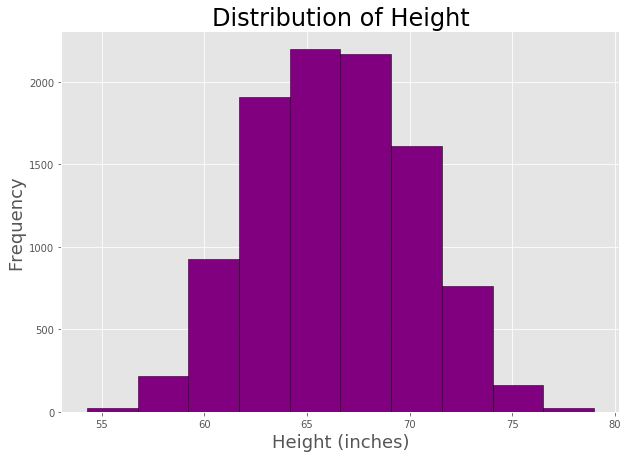

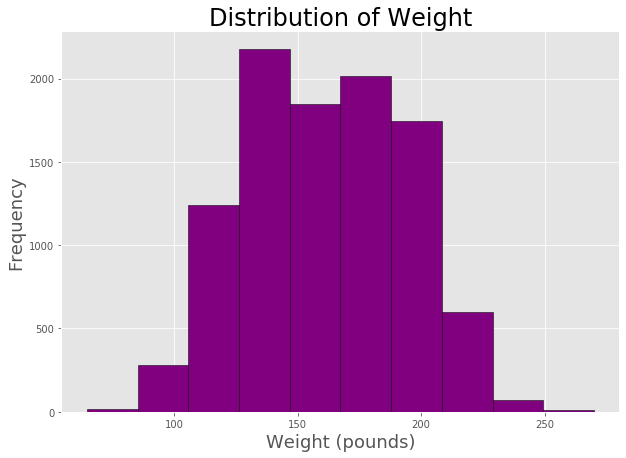

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 身高的直方圖 Histogram of the height
plt.figure(1)
df.Height.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

# 體重的直方圖 Histogram of the weight
plt.figure(2)
df.Weight.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

上面畫的兩張圖分別為**身高的分布圖**以及**體重的分布圖**，我們大致上可以看出這份資料裡面所有人的體重分布大概呈現一個**正態分布(Normal distribution)**  
  
當然，除了畫出全部人的身高、體重分布，我們也可以分別畫出不同**性別**的體重分布。

Text(0, 0.5, 'Frequency')

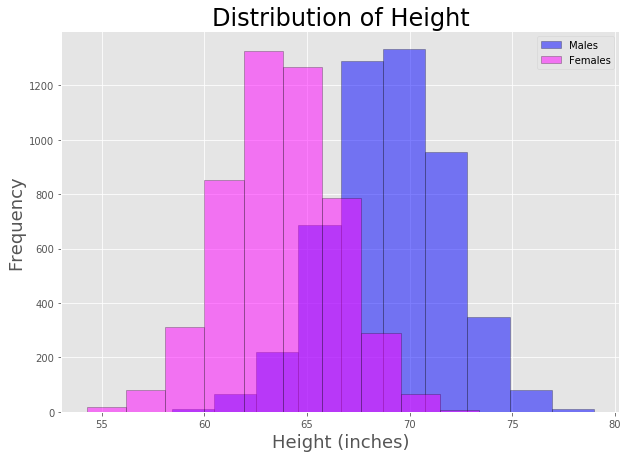

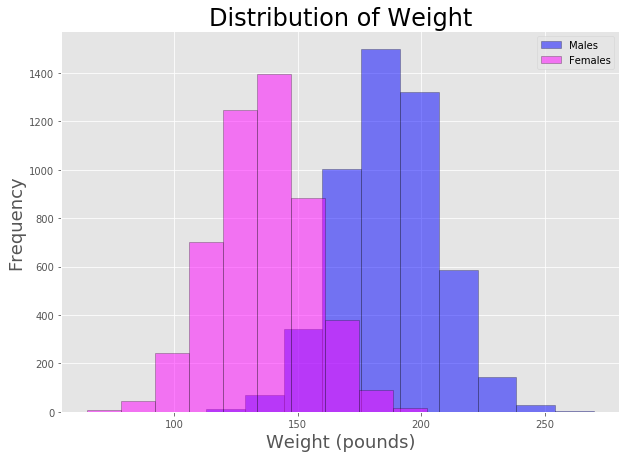

In [35]:
# Histogram of the height males and females
plt.figure(1)
df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

# Histogram of the weight males and females
plt.figure(2)
df[df['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18)

上面我們分別畫出了不同**性別**的身高/體重分布, 其中粉紅色為女性的分布, 藍色為男性的分布。  
  
另外可以觀察到, 在這份資料中, 不管是男女性的體重或是身高, 其分布都大概是**正態分布(Normal Distribution)**, 但是不管是身高或體重, 男性  的分布都稍微比女性高了一些.  
  
接著我們利用pandas提供的方法(method)**decribe**計算一些統計參數

In [36]:
# 男性的統計參數
statistics_male = df[df['Gender']=='Male'].describe()
statistics_male.rename(columns=lambda x:x+'_male',inplace=True)

# 女性的統計參數
statistics_female = df[df['Gender']=='Female'].describe()
statistics_female.rename(columns=lambda x:x+'_female',inplace=True)

# 合併男性、女性統計參數
statistics_all = df.describe()
statistics = pd.concat([statistics_male, statistics_female, statistics_all], axis=1)

statistics

,Height_male,Weight_male,Height_female,Weight_female,Height,Weight
count,5000.000000,5000.000000,5000.000000,5000.000000,10000.000000,10000.000000
mean,69.026346,187.020621,63.708774,135.860093,66.367560,161.440357
std,2.863362,19.781155,2.696284,19.022468,3.847528,32.108439
min,58.406905,112.902939,54.263133,64.700127,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096,63.505620,135.818051
50%,69.027709,187.033546,63.730924,136.117583,66.318070,161.212928
75%,70.988744,200.357802,65.563565,148.810926,69.174262,187.169525
max,78.998742,269.989699,73.389586,202.237214,78.998742,269.989699


上面兩個步驟, 畫出分布圖、以及計算出資料基本的統計參數(平均值、標準差......)可以被稱作初步的**探索性資料分析(Exploratory data analysis, EDA)**, 也就是視覺化以及摘要性的統計.  
而做EDA的目的在於幫助我們理解資料、找尋資料的特性甚至發現資料中的異常之處, 對我們後續更深入的分析、建模是很有幫助的.  
  
接著我們將進入本篇的主題 ： **線性回歸(Linear Regression)**  
在了解一份資料集之後，我們通常對資料會有一些的猜測，以這份資料為例，我們很直覺的會認為身高與體重是有某種關係的, 而我們也會很自然地認為 : 或許可以利用身高來預測體重，或者用體重預測身高. 而這個利用某些特徵預測某個數值的行為，稱為建模(Modeling).

# Scatter plots with Matplotlib and linear regression with Numpy
散點圖(scatter plot)是一個二維資料的視覺化方法，而其可以讓我們很好的觀察資料集中兩個數值變量的關係(也就是x軸與y軸的關係).  
接下來我們會示範如何利用python中的開源套件**Matplotlib**來視覺化我們的資料集.
  
下面的圖我們將我們的資料分別以了男性(藍色)與女性(粉紅色)的呈現.  其中橫軸為身高(Height), 縱軸為體重(Weight)

Text(0, 0.5, 'Weight (pounds)')

<Figure size 432x288 with 0 Axes>

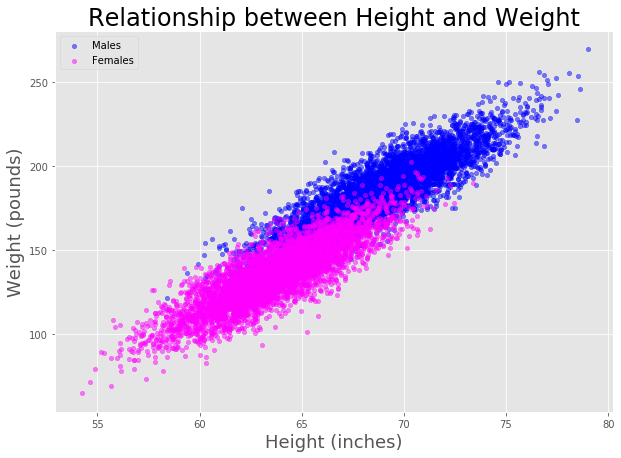

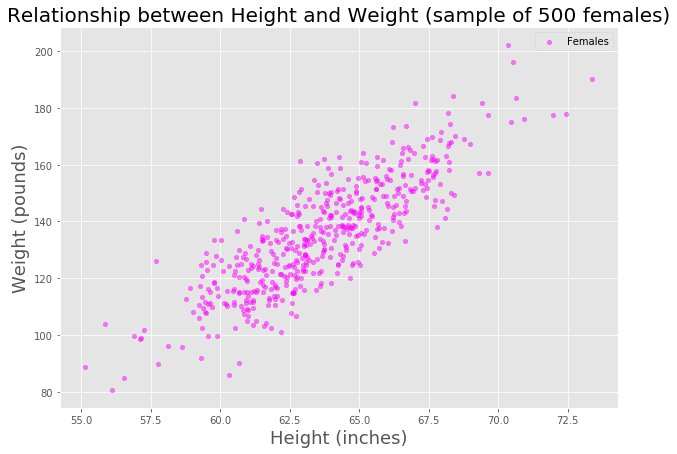

In [37]:
plt.figure(1)
ax1= df[df['Gender']=='Male'].plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(10,7))
df[df['Gender']=='Female'].plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

plt.figure(2)
sample_females = df[df['Gender']=='Female'].sample(500)
sample_females.plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

上面第一張圖中共有一萬個點(男生5000, 女生5000).  
而為了更清楚的觀察變數間的關係，我們在第二張隨機取樣(sample)500個女性的資料點，將其視覺化出來.  

我們也可以大致看出, 隨著身高的增加, 體重也會上升, 散點圖似乎顯示著身高與體重有某種**線性關係**   
也就是 :  $$y = ax + b$$
其中x即為Height, y即為Weight, a為斜率(slope), b為節距(intercept).
為了求得上式中的a, b 我們可以利用**最小化誤差**的方式來**fit**我們的資料，也就是找到最能代表我們資料集的那條線(誤差最小的那條線).
在線性回歸中，我們的誤差通常是用下式計算 : $$error = y(real) - y(predicted) = y(real) - (ax+b)$$  
  
而在numpy之中我們可以很輕易的使用numpy.polyfit(x,y,deg)來fit我們的資料, 其中deg代表要使用幾次函數來fit我們的資料，在本章中我們將使用deg=1 也就是線性回歸.

In [38]:
import numpy as np

# Best fit polynomials.

df_males = df[df['Gender']=='Male']
df_females = df[df['Gender']=='Female']

# Polynomial males.
male_fit = np.polyfit(df_males.Height,df_males.Weight,1)
print(f'Male fit : {male_fit}')

# Polynomial females.
female_fit = np.polyfit(df_females.Height,df_females.Weight,1)
print(f'Female fit : {female_fit}')

Male fit : [   5.96177381 -224.49884071]
Female fit : [   5.99404661 -246.01326575]


下面我們分別畫出男性的回歸線以及女性的回歸線.

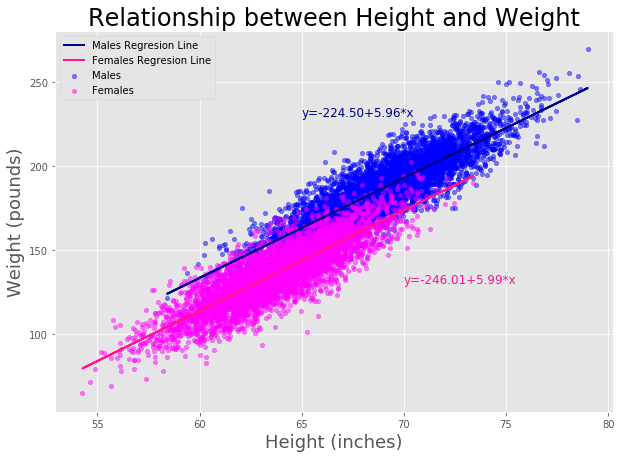

In [39]:
# Scatter plots and regression lines.

# Males and Females dataframes.

df_males = df[df['Gender']=='Male']
df_females = df[df['Gender']=='Female']

# Scatter plots.
ax1= df_males.plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(10,7))
df_females.plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)

# Regression lines.
plt.plot(df_males.Height,male_fit[0]*df_males.Height+male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height,female_fit[0]*df_females.Height+female_fit[1], color='deeppink', linewidth=2)

# Regression equations.
plt.text(65,230,'y={:.2f}+{:.2f}*x'.format(male_fit[1],male_fit[0]),color='darkblue',size=12)
plt.text(70,130,'y={:.2f}+{:.2f}*x'.format(female_fit[1],female_fit[0]),color='deeppink',size=12)

# Legend, title and labels.
plt.legend(labels=['Males Regresion Line','Females Regresion Line', 'Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

# Scatter plots and linear regression line with seaborn
Seaborn 是以matplotlib為基底的一個視覺化套件，而它也提供了一些簡單的回歸函數給我們方便的調用。

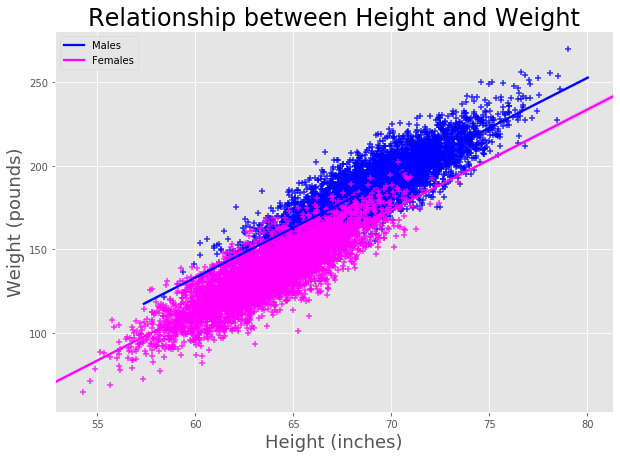

In [40]:
import seaborn as sns

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males.Height,y=df_males.Weight,color='blue', marker='+')
sns.regplot(x=df_females.Height,y=df_females.Weight,color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

為了更好的視覺化，下面我們將sample資料集中的300個單位作為我們的視覺化。

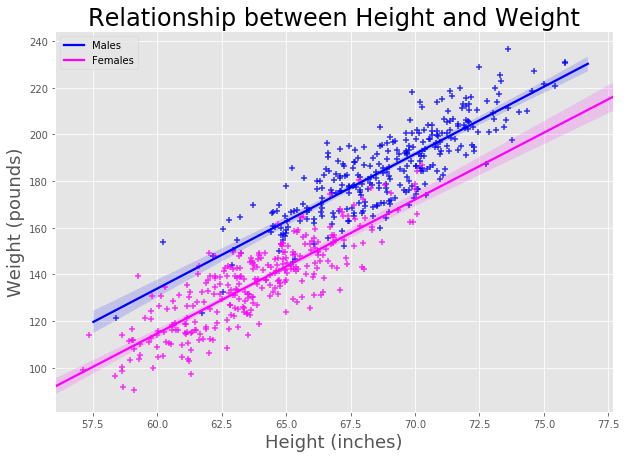

In [41]:
import seaborn as sns

# Samples
df_males_sample= df[df['Gender']=='Male'].sample(300)
df_females_sample= df[df['Gender']=='Female'].sample(300)

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males_sample.Height,y=df_males_sample.Weight,color='blue', marker='+')
sns.regplot(x=df_females_sample.Height,y=df_females_sample.Weight,color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

# Fitting a simple linear model using sklearn


Scikit-learn 是免費的python機器學習套件，我們可以很輕易地使用它來做一些機器學習。  
下面我們將示範線性回歸是如何實現在我們的資料中。

In [42]:
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender']=='Male']

# Create linear regression object.
lr_males= LinearRegression()

# Fit linear regression.
lr_males.fit(df_males[['Height']], df_males['Weight'])

# Get the slope and intercept of the line best fit.
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381


df_females = df[df['Gender']=='Female']

# Create linear regression object.
lr_females= LinearRegression()

# Fit linear regression.
lr_females.fit(df_females[['Height']], df_females['Weight'])

# Get the slope and intercept of the line best fit.
print(lr_females.intercept_)
# -246.01326574667277

print(lr_females.coef_)
# 5.99404661

-224.49884070545858
[5.96177381]
-246.01326574667254
[5.99404661]


前面我們展示了各種不同的套件如numpy, sklearn 甚至seaborn都可以為我們做線性回歸。  
而即使是不同的套件訓練出來的模型，它的參數都是大同小異的，因為我們的目標函數是基於同一組資料集(dataset)、同一個損失函數(loss function)  
  
下面我們將示範不同的模型是如何預測一個新的資料點，以及不同模型的結果會有相同的答案。

In [43]:
df_females = df[df['Gender']=='Female']

# Fit the model using numpy.
female_fit = np.polyfit(df_females.Height,df_females.Weight,1)

# Predictions using numpy.
print(np.polyval(female_fit,[60]))
# [113.62953114]

# Fit the model using scikit learn.
lr_females= LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# Predictions using scikit learn.
print(lr_females.predict([[60]]))
# [113.62953114]

[113.62953114]
[113.62953114]


# Pearson correlation coefficient
相關係數是藉由兩個變數多相關而計算得出。其中最常用的一個計算方式稱作Pearson correlation coefficient  
用於度量兩個變數之間的相關程度（線性相依），其值介於-1與1之間。  
在自然科學領域中，該係數廣泛用於度量兩個變數之間的線性相依程度。  
各種不同的相關性如下圖所示
![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)
  
而在pandas中有提供了計算相關係數的方法 .corr() 

In [44]:
# Dataframe containing only females.
df_females = df[df['Gender']=='Female']

# Correlation coefficients 
df_females.corr()

,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


In [45]:
# Dataframe containing only males.
df_males = df[df['Gender']=='Male']

# Correlation coefficients 
df_males.corr()

,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


A rule of thumb for interpreting the size of the correlation coefficient is the following:  
* 1–0.8 → Very strong  
* 0.799–0.6 → Strong  
* 0.599–0.4 → Moderate  
* 0.399–0.2 → Weak  
* 0.199–0 → Very Weak  
  
而在上面的計算中，不論男女，我們都可以看到體重與身高是有高度相關性的。  

而當然，python中也有其他套件(scipy)可以幫助我們計算correlation coefficient  
scipy.stats.pearsonr(x, y) 回傳 the Pearson correlation coefficient and the p-value.

In [46]:
from scipy import stats

# Dataframe containing only females.
df_females = df[df['Gender']=='Female']

# Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
# 0.849608591418601

# Dataframe containing only males.
df_males = df[df['Gender']=='Male']

# Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)
# 0.8629788486163176

0.8496085914186008
0.8629788486163177


As can be observed, the correlation coefficients using Pandas and Scipy are the same:  
* Females correlation coefficient: 0.849608
* Males correlation coefficient: 0.8629788

# Residual plots
We can use numerical values such as the Pearson correlation coefficient or visualization tools such as the scatter plot to evaluate whether or not linear regression is appropriate to predict the data. Another way to perform this evaluation is by using residual plots. Residual plots show the difference between actual and predicted values. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.  

We can use Seaborn to create residual plots as follows:

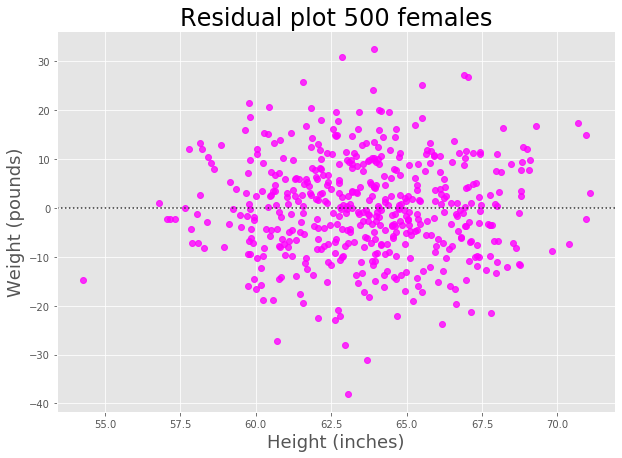

In [47]:
import seaborn as sns

# Dataframe containing only females.
df_females = df[df['Gender']=='Female'].sample(500)

# Residual plot 500 females.
fig = plt.figure(figsize=(10,7))
sns.residplot(df_females.Height, df_females.Weight, color='magenta')

# Title and labels.
plt.title('Residual plot 500 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

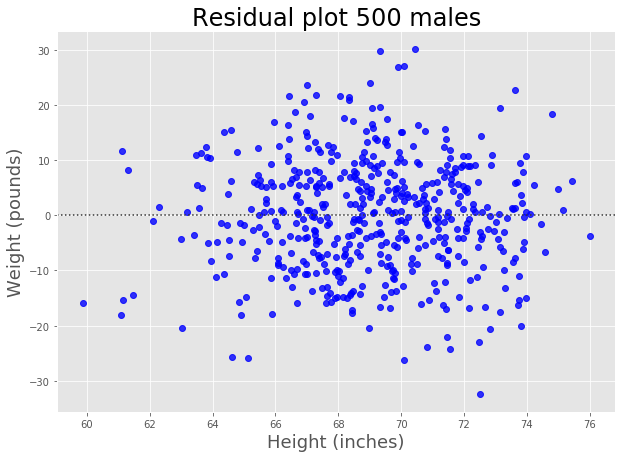

In [48]:
# Dataframe containing only males.
df_males = df[df['Gender']=='Male'].sample(500)

# Residual plot 500 males.
fig = plt.figure(figsize=(10,7))
sns.residplot(df_males.Height, df_males.Weight, color='blue')

# Title and labels.
plt.title('Residual plot 500 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

As we can see, the points are randomly distributed around 0, meaning linear regression is an appropriate model to predict our data. If the residual plot presents a curvature, the linear assumption is incorrect. In this case, a non-linear function will be more suitable to predict the data.  

# Multiple linear regression
Simple linear regression uses a linear function to predict the value of a target variable y, containing the function only one independent variable x₁.  
$y = a_0 + a_1x_1$ 

After fitting the linear equation to observed data, we can obtain the values of the parameters b₀ and b₁ that best fits the data, minimizing the **square error**.  

Previously, we have calculated two linear models, one for men and another for women, to predict the weight based on the height of a person, obtaining the following results:  

* Males → Weight = -224.50+5.96*Height
* Females → Weight = -246.01+5.99*Height

So far, we have employed one independent variable to predict the weight of the person Weight = f(Height) , creating two different models. Maybe you are thinking 💭 ❓ Can we create a model that predicts the weight using both height and gender as independent variables? The answer is YES! 😄 ⭐️ And here is where multiple linear regression comes into play!  

**Multiple linear regression** uses a linear function to predict the value of a target variable y, containing the function n independent variable **x=[x₁,x₂,x₃,…,xₙ]**.
$y=a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n$

We obtain the values of the parameters aᵢ, using the same technique as in simple linear regression (**least square error**). After fitting the model, we can use the equation to predict the value of the target variable y. In our case, we use height and gender to predict the weight of a person **Weight = f(Height,Gender)**.

# Categorical variables in multiple linear regression
There are two types of variables used in statistics: numerical and categorical variables.  

* Numerical variables represent values that can be measured and sorted in ascending and descending order such as the height of a person.  
* Categorical variables are values that can be sorted in groups or categories such as the gender of a person.  
  
**Multiple linear regression** accepts not only **numerical variables**, but also **categorical** ones. To include a categorical variable in a regression model, the variable has to be encoded as a **binary variable (dummy variable)**. In Pandas, we can easily convert a **categorical variable** into a **dummy variable** using the **pandas.get_dummies** function. This function returns a dummy-coded data where 1 represents the presence of the categorical variable and 0 the absence.

In [49]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1


To avoid multi-collinearity, we have to drop one of the dummy columns.


In [50]:
# Drop female column.
df_dummy.drop('Gender_Female',axis=1,inplace=True)

# Rename Gender_Male column.
df_dummy.rename(columns={'Gender_Male':'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns.
df_dummy.head()

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


Then, we can use this dataframe to obtain a multiple linear regression model using Scikit-learn.


In [51]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()

# Fit linear regression.
mlr.fit(df_dummy[['Height','Gender']], df_dummy['Weight'])

# Get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

-244.9235025206997
[ 5.97694123 19.37771052]


After fitting the linear equation, we obtain the following multiple linear regression model:  
* Weight = -244.9235+5.9769*Height+19.3777*Gender

If we want to predict the weight of a male, the gender value is 1, obtaining the following equation:  
* Male → Weight = -244.9235+5.9769*Height+19.3777*1= -225.5458+5.9769*Height

For females, the gender has a value of 0.
* Female → Weight = -244.9235+5.9769*Height+19.3777*0 =-244.9235+5.9769*Height

If we compare the simple linear models with the multiple linear model, we can observe similar prediction results. The gender variable of the multiple linear regression model changes only the intercept of the line. 🙌

# Key takeaways

1. Simple linear regression is a linear approach to model the relationship between a dependent variable and one independent variable.

2. Multiple linear regression uses a linear function to predict the value of a dependent variable containing the function n independent variables.

3. Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics.

4. Histograms are plots that show the distribution of a numeric variable, grouping data into bins.

5. Pandas provides methods and functions for exploratory data analysis such as, Dataframe.describe(), Dataframe.info(), Dataframe.dtypes, and Dataframe.shape.

6. Scatter plots are two dimensional data visualization that show the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis. Matplotlib and Seaborn provide built in functions to plot scatter plots.

7. We can fit a simple linear regression model using libraries such as Numpy or Scikit-learn.

8. Correlation measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables.

9. Residual plots can be used to analyse whether or not a linear regression model is appropriate for the data.

10. Categorical variables have to be converted into dummy variables to use them in multiple linear regression models.